In [1]:
import numpy as np

import pandas as pd

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN

!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
from folium.plugins import HeatMap

print("All libraries and resources imported.")

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

All libraries and resources imported.


In [2]:
## Getting the geolocation of Lisbon

address = 'Lisbon, Portugal'
geoloc = Nominatim(user_agent = "qferreiraclinpsych@gmail.com")
location = geoloc.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The coordinates of Lisbon are: ",latitude,",", longitude)



The coordinates of Lisbon are:  38.7077507 , -9.1365919


In [3]:
## Foursquare API to find venues and hotels

CLIENT_ID = 'REDACTED'
CLIENT_SECRET = 'REDACTED'
VERSION = '20180604'
LIMIT = 1000
RADIUS = 1000

foursq1 = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fa931735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    RADIUS, 
    LIMIT)

foursq1

'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fa931735&client_id=REDACTED&client_secret=REDACTEDv=20180604&ll=38.7077507,-9.1365919&radius=1000&limit=1000'

In [4]:
##loading the Json File

response = requests.get(foursq1)
fsqjs = json.loads(response.text)

fsqjs

{'meta': {'code': 200, 'requestId': '603638544e785233eef35a7b'},
 'response': {'venues': [{'id': '4bb6f76f2ea195217473ac2f',
    'name': 'Yes! Lisbon Hostel',
    'location': {'address': 'R. de São Julião, 148',
     'lat': 38.70913099044464,
     'lng': -9.137633821277609,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.70913099044464,
       'lng': -9.137633821277609}],
     'distance': 178,
     'postalCode': '1100-527',
     'cc': 'PT',
     'city': 'Lisboa',
     'state': 'Lisboa',
     'country': 'Portugal',
     'formattedAddress': ['R. de São Julião, 148',
      '1100-527 Lisboa',
      'Portugal']},
    'categories': [{'id': '4bf58dd8d48988d1ee931735',
      'name': 'Hostel',
      'pluralName': 'Hostels',
      'shortName': 'Hostel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hostel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1614166100',
    'hasPerk': False},
   {'id': '508b15bde4b0e9aaf98152a1',
    

I executed a hotel query to Foursquare to return hotels directly, and it returned several nested dictionaries and lists further nested within a dictionary.
I decided the quickest way to create a dataframe would be to extract the relevant values from the nested dictionaries/lists, create one list per column and finally merge them into a single dataframe.

In [5]:
hotel_list = []

q1 = fsqjs['response']['venues']
x = 0
while x < len(q1):
    vn = q1[x]
    hotel_list.append(vn['name'])
    x += 1
    


In [6]:
hotel_list

['Yes! Lisbon Hostel',
 'Hostel 4U Lisboa',
 'Rossio Boutique Hotel',
 'Porta Do Mar',
 'My Story Hotel Figueira',
 'Pensão Estação Central',
 'The Lift Boutique Hotel',
 'No Limit Bairro Alto',
 'Ala Residencia Martim Moniz',
 'Living Lisboa Baixa',
 'Esquina Cosmopolitan Lodge',
 'Hostel B.Mar',
 '1999 Meets Lissabon',
 'Albergaria Insulana',
 'Historical Gem Baixa',
 'Santa Justa Prime Guesthouse',
 'Bons Dias',
 'Lisbon Wine Hotel',
 'Host Bell Rooms& Suites',
 'Surf In Chiado',
 'Alma Moura - Lisbon residences',
 'Zuzabed Lisbon Suites',
 'Alface Hostel Lisboa',
 'City Stays Cais do Sodre Apartments',
 'Downtown 75 Prestige',
 'Sweet Inn Garett Stylish',
 'Casa Balthazar Hotel',
 'Sweet Lisbon House',
 'Alecrim Chiado Lisbon Typical',
 'Waytostay',
 'Waytostay',
 'Hotel Borges Chiado',
 'Hotel convento do Salvador',
 'Hotel Portugal',
 'Lisbon Destination Hostel',
 'Ascensor da Bica',
 "Rossio Studio's",
 'Pensao Globo Guesthouse',
 'House4ba',
 'Bom Comforto',
 'Evidencia Light',

In [7]:
venue_type_list = []

q1 = fsqjs['response']['venues']
x = 0
while x < len(q1):
    vn = q1[x]
    x += 1
    for y in vn['categories']:
        z = 0
        while z < len(vn['categories']):
            zn = vn['categories'][z]
            venue_type_list.append(zn['name'])
            z += 1
            
        

In [8]:
venue_type_list

['Hostel',
 'Hostel',
 'Hotel',
 'Residential Building (Apartment / Condo)',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hostel',
 'Hotel',
 'Hotel',
 'Hostel',
 'Hotel',
 'Hotel',
 'Vacation Rental',
 'Vacation Rental',
 'Hotel',
 'Hotel',
 'Hostel',
 'Hostel',
 'Hotel',
 'Hotel',
 'Hostel',
 'Hostel',
 'Bed & Breakfast',
 'Residential Building (Apartment / Condo)',
 'Bed & Breakfast',
 'Bed & Breakfast',
 'Boarding House',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hostel',
 'Hotel',
 'Hotel',
 'Boarding House',
 'Hotel',
 'Hostel',
 'Hotel',
 'Hostel',
 'Hostel',
 'Bed & Breakfast',
 'Hotel Pool',
 'Hotel',
 'Hostel',
 'Hostel']

In [9]:
hotel_lat_list = []
hotel_lon_list = []

q1 = fsqjs['response']['venues']
x = 0
while x < len(q1):
    vn = q1[x]
    hotel_lat_list.append(vn['location']['lat'])
    hotel_lon_list.append(vn['location']['lng'])
    x += 1
    
# Printing the lengths of the lists to make sure they are equal.
print(len(hotel_lat_list),len(hotel_lon_list))

48 48


In [10]:
## joining my lists into a dataframe.

hotel_df = pd.DataFrame(np.column_stack([hotel_list, venue_type_list, hotel_lat_list, hotel_lon_list]), 
                               columns=['Hotel_Name', 'Type_of_Accomodation', 'Latitude', 'Longitude'])

In [11]:
hotel_df.head(50)

,Hotel_Name,Type_of_Accomodation,Latitude,Longitude
0,Yes! Lisbon Hostel,Hostel,38.70913099044464,-9.137633821277609
1,Hostel 4U Lisboa,Hostel,38.7108447075288,-9.13538526881344
2,Rossio Boutique Hotel,Hotel,38.71495,-9.138443
3,Porta Do Mar,Residential Building (Apartment / Condo),38.7091,-9.134064
4,My Story Hotel Figueira,Hotel,38.713847,-9.137228
5,Pensão Estação Central,Hotel,38.71346572668877,-9.140095148078746
6,The Lift Boutique Hotel,Hotel,38.71233478013487,-9.13930304587773
7,No Limit Bairro Alto,Hotel,38.710835,-9.143601
8,Ala Residencia Martim Moniz,Hostel,38.716873,-9.134494
9,Living Lisboa Baixa,Hotel,38.71114654519605,-9.137325373816335


Now that I have a dataframe, I need to wrangle the data a bit more in order to plot the hotels on a map.

In [12]:
## excluding some results that aren't hotels

hot_excl_list = ['Hostel', 'Boarding House','Hotel Pool']

hotel_df = hotel_df.drop(hotel_df[hotel_df.Type_of_Accomodation.isin(hot_excl_list)].index.tolist())

In [13]:
## changing the datatypes of the latitude and longitude columns into floats, so they can be plotted onto the map

hotel_df['Latitude'] = hotel_df['Latitude'].astype('float64')
hotel_df['Longitude'] = hotel_df['Longitude'].astype('float64')

print(hotel_df.dtypes)

Hotel_Name               object
Type_of_Accomodation     object
Latitude                float64
Longitude               float64
dtype: object


In [14]:
## mapping the hotels in Lisbon

Lis_hotel_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, hotel, hot_type in zip(hotel_df['Latitude'], hotel_df['Longitude'], hotel_df['Hotel_Name'], hotel_df['Type_of_Accomodation']):
    label = '{}, {}'.format(hotel, hot_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#c8b1e5',
        fill_opacity=1.5,
        ).add_to(Lis_hotel_map)  
    
Lis_hotel_map

Now that I've mapped out some of the hotels in Lisbon, I am turning my attention to the Fado venues there.
I decided to use Google API instead of Foursquare, because I haven't had the change to work with the Google API just yet and would like to try it out.

In [15]:
G_url = 'https://maps.googleapis.com/maps/api/place/textsearch/json?query=Fado+Venues+in+Lisbon&location=38.7077507,-9.1365919&radius=10000&key=REDACTED'

In [16]:
response1 = requests.get(G_url)
g_jsrs = json.loads(response1.text)

In [17]:
res_g = g_jsrs['results']

In [18]:
res_g

[{'business_status': 'OPERATIONAL',
  'formatted_address': 'R. da Misericórdia 14, 1200-443 Lisboa, Portugal',
  'geometry': {'location': {'lat': 38.711422, 'lng': -9.1428429},
   'viewport': {'northeast': {'lat': 38.71277237989272,
     'lng': -9.141535270107276},
    'southwest': {'lat': 38.71007272010728, 'lng': -9.14423492989272}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png',
  'name': 'Fado in Chiado | Fado in Lisbon',
  'opening_hours': {'open_now': False},
  'place_id': 'ChIJFXX9CX80GQ0RCMib_8vi7YI',
  'plus_code': {'compound_code': 'PV64+HV Lisbon',
   'global_code': '8CCGPV64+HV'},
  'rating': 5,
  'reference': 'ChIJFXX9CX80GQ0RCMib_8vi7YI',
  'types': ['point_of_interest', 'establishment'],
  'user_ratings_total': 2},
 {'business_status': 'OPERATIONAL',
  'formatted_address': 'R. do Norte nº 91, 1200-284 Lisboa, Portugal',
  'geometry': {'location': {'lat': 38.712294, 'lng': -9.143813},
   'viewport': {'northeast': {'lat': 

In [19]:
## Creating lists of the name, latitude and longitude of the Fado venues

fado_name_l = []
fado_lat_l = []
fado_lon_l = []
i = 0
while i < len(res_g):
    fado_l = res_g[i]
    fado_name_l.append(fado_l['name'])
    fado_lat_l.append(fado_l['geometry']['location']['lat'])
    fado_lon_l.append(fado_l['geometry']['location']['lng'])
    i += 1


In [20]:
# Printing the lengths of the lists to make sure they are equal.

print(len(fado_name_l),len(fado_lat_l),len(fado_lon_l))

20 20 20


In [21]:
## creating a dataframe of Fado venues.

fado_df = pd.DataFrame(np.column_stack([fado_name_l, fado_lat_l, fado_lon_l]), 
                               columns=['Fado_Venue_Name', 'Latitude', 'Longitude'])

fado_df.head(20)

,Fado_Venue_Name,Latitude,Longitude
0,Fado in Chiado | Fado in Lisbon,38.711422,-9.1428429
1,Adega Machado - Fado & Food Group,38.712294,-9.143813
2,Mesa De Frades,38.7131006,-9.1260757
3,Páteo de Alfama,38.7102667,-9.129925
4,Café Luso - Fado & Food Group,38.7130556,-9.1438889
5,Tasca do Chico,38.7116451,-9.1441389
6,Live Fado,38.7122435,-9.1437096
7,Casa de Linhares - FADO,38.7091595,-9.130906
8,Clube de Fado - Fado & Food Group,38.7097222,-9.1311111
9,Duetos da Sé,38.7093017,-9.132198899999999


In [22]:
## changing the latititude and longitude values into real numbers, and checking the types:

fado_df['Latitude'] = fado_df['Latitude'].astype('float64')
fado_df['Longitude'] = fado_df['Longitude'].astype('float64')

print(fado_df.dtypes)

Fado_Venue_Name     object
Latitude           float64
Longitude          float64
dtype: object


In [23]:
## Mapping the Fado venues

Lis_fado_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, fado_n, in zip(fado_df['Latitude'], fado_df['Longitude'], fado_df['Fado_Venue_Name']):
    label = fado_n
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='turquoise',
        fill=True,
        fill_color='#0082c4',
        fill_opacity=1.5,
        ).add_to(Lis_fado_map)
    
Lis_fado_map

As we can see, most of the Fado venues are located in the Alfama and Baixa Chiado Districts, however there seems to be very few hotels in the Alfama district so we need to determine where exactly the cultural hotspot would be for our location.

In [24]:
## mapping the Fado venues and Hotels onto the same map:

Lis_joined_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, fado_n, in zip(fado_df['Latitude'], fado_df['Longitude'], fado_df['Fado_Venue_Name']):
    label = fado_n
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='turquoise',
        fill=True,
        fill_color='#0082c4',
        fill_opacity=1.5,
        ).add_to(Lis_joined_map)
for lat, lng, hotel, hot_type in zip(hotel_df['Latitude'], hotel_df['Longitude'], hotel_df['Hotel_Name'], hotel_df['Type_of_Accomodation']):
    label = '{}, {}'.format(hotel, hot_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#c8b1e5',
        fill_opacity=1.5,
        ).add_to(Lis_joined_map)
Lis_joined_map

In [25]:
## Now I am going to convert my latitudes and longitudes to a 2D array, so we can start the clustering.

ha1 = hotel_df[['Latitude', 'Longitude']]
fa1 = fado_df[['Latitude','Longitude']]

merged_dfs = pd.concat([ha1, fa1])

merged_dfs.reset_index(drop=True, inplace = True)
merged_dfs

hotfad1 = merged_dfs['Latitude']
hotfad2 = merged_dfs['Longitude']

# I need a 2D array to work with DBSCAN, so I stack the columns

hotfad = np.column_stack((hotfad1,hotfad2))

hotfad

array([[38.71495   , -9.138443  ],
       [38.7091    , -9.134064  ],
       [38.713847  , -9.137228  ],
       [38.71346573, -9.14009515],
       [38.71233478, -9.13930305],
       [38.710835  , -9.143601  ],
       [38.71114655, -9.13732537],
       [38.711913  , -9.135967  ],
       [38.71307   , -9.13933   ],
       [38.71184656, -9.13776834],
       [38.711058  , -9.138244  ],
       [38.712352  , -9.13805   ],
       [38.713537  , -9.140551  ],
       [38.71626   , -9.140413  ],
       [38.713356  , -9.128646  ],
       [38.71226288, -9.14342897],
       [38.709948  , -9.135181  ],
       [38.712204  , -9.144512  ],
       [38.71325411, -9.14133732],
       [38.71404683, -9.12397388],
       [38.71761   , -9.14271   ],
       [38.7119    , -9.14411   ],
       [38.71066322, -9.1418215 ],
       [38.71280684, -9.12989178],
       [38.71439984, -9.13686492],
       [38.70855929, -9.14683721],
       [38.71404   , -9.138127  ],
       [38.71493377, -9.14532069],
       [38.71071399,

In [26]:
## running the DBSCAN algorithm to cluster based on 15 venues within 250 meters of each other.

db = DBSCAN(eps=0.25/6371., min_samples=15, algorithm='ball_tree', metric='haversine').fit(np.radians(hotfad))

In [27]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([hotfad[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 2


In [28]:
cluster_labels

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
        0,  0, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0, -1, -1],
      dtype=int64)

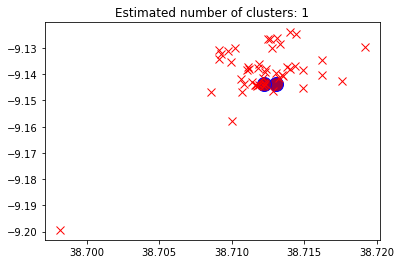

In [29]:
## plotting the clusters, and checking for outliers

core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)

    xy = hotfad[class_member_mask & core_samples_mask] ## These are the clustered datapoints
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)

    xx = hotfad[class_member_mask & ~core_samples_mask] ## These are the outliers which will be excluded
    plt.plot(xx[:, 0], xx[:, 1], 'x', markerfacecolor=tuple(col),
             markeredgecolor='r', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [30]:
## this will be my dataframe of outliers for exclusion in the heatmap

excl_df = pd.DataFrame(xx, columns=['Latitude', 'Longitude'])

excl_df

,Latitude,Longitude
0,38.714950,-9.138443
1,38.709100,-9.134064
2,38.713847,-9.137228
3,38.713466,-9.140095
4,38.712335,-9.139303
5,38.711147,-9.137325
6,38.711913,-9.135967
7,38.713070,-9.139330
8,38.711847,-9.137768
9,38.711058,-9.138244


In [31]:
# A dataframe of the latitude and longitudes of my merged Fado and Hotel Dataframes

merged_lat_lon = merged_dfs[['Latitude','Longitude']]


In [38]:
## The dataframe excluding the outlying venues

final_df = merged_lat_lon.merge(excl_df, how = 'outer', indicator =True).loc[lambda x: x['_merge']=='left_only']


In [39]:
## a list for my heatmap

hm_data = [[row['Latitude'],row['Longitude']] for index, row in final_df.iterrows()]

In [40]:
## lastly, creating a heatmap where the heat signifies the venues that fall into a density cluster of 10 venues per 250m

center = latitude,longitude
hm_lisbon = folium.Map(location = center, zoom_start=15)

for lat, lng, fado_n, in zip(fado_df['Latitude'], fado_df['Longitude'], fado_df['Fado_Venue_Name']):
    label = fado_n
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='turquoise',
        fill=True,
        fill_color='#0082c4',
        fill_opacity=1.5,
        ).add_to(hm_lisbon)
for lat, lng, hotel, hot_type in zip(hotel_df['Latitude'], hotel_df['Longitude'], hotel_df['Hotel_Name'], hotel_df['Type_of_Accomodation']):
    label = '{}, {}'.format(hotel, hot_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#c8b1e5',
        fill_opacity=1.5,
        ).add_to(hm_lisbon)
    
folium.TileLayer('cartodbpositron').add_to(hm_lisbon)
folium.Marker(center, popup='Lisbon Centre').add_to(hm_lisbon)
HeatMap(hm_data).add_to(hm_lisbon)

hm_lisbon